## Importing Libraries

In [1]:
# importing required modules
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import csv
import re
import string


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading data

In [3]:
git = "https://github.com/Deadshot-07/Applied-Machine-Learning/blob/T/Assignment_1/smsspamcollection.zip?raw=true"

In [4]:
def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

In [5]:
download_and_unzip(git)

In [6]:
%ls

readme  sample_data/  SMSSpamCollection


In [7]:
messages = pd.read_csv('./SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE, names=["Label", "Message"])

In [8]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.isna().sum()

Label      0
Message    0
dtype: int64

In [10]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Converting ham to 0 and spam to 1's in the label columns.  
Note that we can also do this manually

In [11]:
encode = LabelEncoder()
messages['Label'] = encode.fit_transform(messages['Label'])
messages['Label'].value_counts()

0    4827
1     747
Name: Label, dtype: int64

In [12]:
def wordCloud(data,label):
    words = ''
    for msg in data[data['Label']==label]['Message']:
        msg = msg.lower()
        words+=msg + ' '
    wc = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wc)
    plt.axis('off')

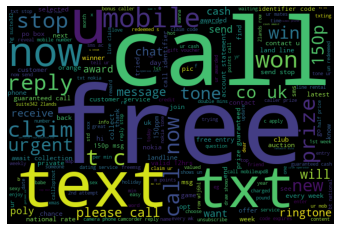

In [13]:
wordCloud(messages,1)

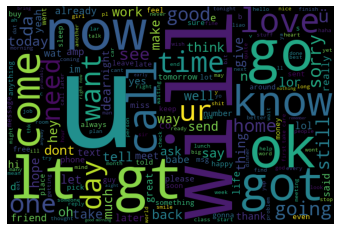

In [14]:
wordCloud(messages,0)

## Preprocessing data

In [15]:
STOPWORDS = set(stopwords.words('english'))

def remove_punct(text):
    pattern = re.compile(r'[^\w\s]')
    return pattern.sub(r'', text)

def to_lower(text):
    return text.lower()

def stopwords(text):
    a = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    if a != '':
        return a
    else:
        return np.nan

def word_tokenizer(text):
    return word_tokenize(text)

def lemmatization(text):
    wnl = WordNetLemmatizer()
    textlist = word_tokenize(text)
    lemmatized_string = ' '.join([wnl.lemmatize(words) for words in textlist])
    return lemmatized_string

In [16]:
corpus = messages['Message'].apply(to_lower)

In [17]:
corpus = corpus.map(remove_punct)

In [18]:
corpus = corpus.map(stopwords)

In [19]:
corpus = corpus.replace(np.nan, '', regex=True)

In [20]:
messages['Text'] = corpus.map(lemmatization)

In [25]:
messages.head()

,Label,Message,Text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


## Splitting data into Training, Validation and Test Set and saving them as csv

In [26]:
X_train, X_test, y_train, y_test = train_test_split(messages.Text, messages['Label'], test_size=0.15, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=11)

In [27]:
len(X_train),len(y_train)

(4026, 4026)

In [28]:
X_train.head()

300     need coffee run tomocant believe time week alr...
4136                      need say anything know outsider
1800                                             hit move
973                              yup thk e shop close lor
5042            ran younger man make pretty baby together
Name: Text, dtype: object

In [29]:
y_train.head()

300     0
4136    0
1800    0
973     0
5042    0
Name: Label, dtype: int64

In [30]:
df_train = pd.DataFrame(list(zip(X_train,y_train)),columns=["Message",'Label'])
df_train.to_csv('Training Data.csv',index=False) 

In [31]:
len(X_val),len(y_val)

(711, 711)

In [32]:
X_val.head()

3864    oh god ive found number im glad text back xaft...
3053                      please leave topicsorry telling
3683    hello hello hi lou sorry took long 2 reply lef...
3271          k actually guy meet sunoco howard right way
2491    dun b sad dun thk abt already concentrate ur p...
Name: Text, dtype: object

In [33]:
y_val.head()

3864    1
3053    0
3683    0
3271    0
2491    0
Name: Label, dtype: int64

In [34]:
df_val = pd.DataFrame(list(zip(X_val,y_val)),columns=["Message",'Label'])
df_val.to_csv('Validation Data.csv',index=False) 

In [35]:
len(X_test),len(y_test)

(837, 837)

In [36]:
X_test.head()

2425                      oh k kbut big hitteranyway good
4226    world suffers lot violence bad people silence ...
4011    wan2 win meetgreet westlife 4 u m8 currently t...
4871    dip cell dead coming u better respond else sha...
1302                         tot u reach liao said tshirt
Name: Text, dtype: object

In [37]:
y_test.head()

2425    0
4226    0
4011    1
4871    0
1302    0
Name: Label, dtype: int64

In [38]:
df_test = pd.DataFrame(list(zip(X_test,y_test)),columns=["Message",'Label'])
df_test.to_csv('Test Data.csv',index=False) 